#Filters

Have you ever tried to blur or sharpen an image in Photoshop, or with the help of a mobile application? If yes, then you have already used convolution kernels.

In this part of the lab, you will learn how to use convolution in OpenCV for image filtering. You will use 2D-convolution kernels and the OpenCV Computer Vision library to apply different blurring and sharpening techniques to an image.

A convolution kernel is a 2D matrix that is used to filter images. Also known as a convolution matrix, a convolution kernel is typically a square, MxN matrix, where both M and N are odd integers (e.g. 3×3, 5×5, 7×7 etc.)

Such kernels can be used to perform mathematical operations on each pixel of an image to achieve a desired effect (like blurring or sharpening an image). In simple terms, convolution of an image with a kernel represents a simple mathematical operation, between the kernel and its corresponding elements in the image.



*   Assume that the center of the kernel is positioned over a specific pixel (p), in an image.
* Then multiply the value of each element in the kernel (1 in this case), with the corresponding pixel element (i.e. its pixel intensity) in the source image.
* Now, sum the result of those multiplications and compute the average.
* Finally, replace the value of pixel (p), with the average value you just computed.



##Applying Identity Kernel

Before we implement blurring and sharpening kernels, let’s first learn about the identity kernel. The identity kernel is a square matrix, where the middle element is 1, and all other elements are zero, as shown below.


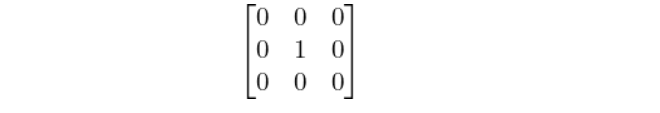

Let’s use this identity kernel with OpenCV filtering functions. We will use the above identity kernel to show that the filtering operation leaves the original image unchanged.  

Start by importing OpenCV and Numpy.

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Read the test image, define the identity kernel, using a 3×3 NumPy array and use the filter2D() function in OpenCV to perform the linear filtering operation.

Display the original and filtered images, using imshow().

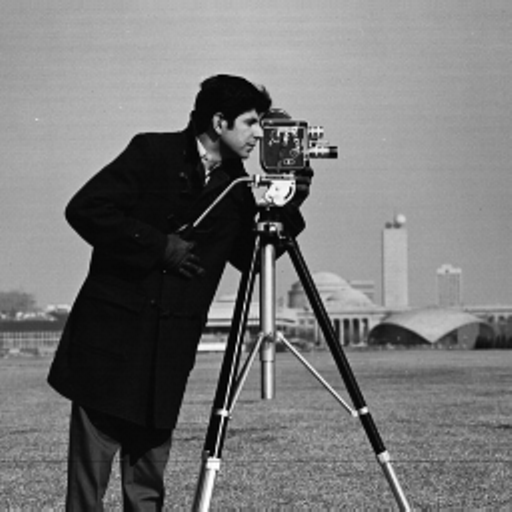

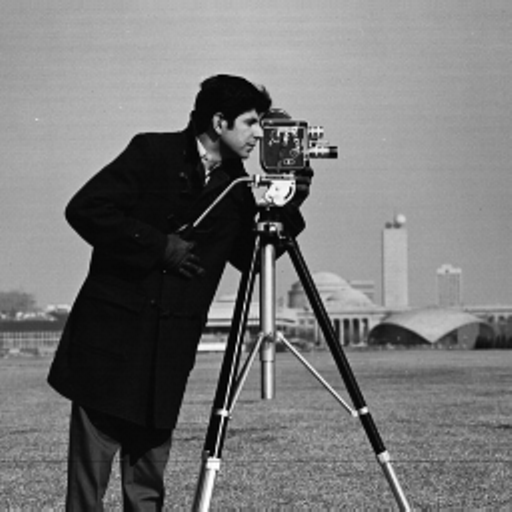

In [ ]:
image = cv2.imread('cameraman.tif')
"""
Apply identity kernel
"""
kernel1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])#define kernel here

# filter2D() function can be used to apply kernel to an image.
# Where ddepth is the desired depth of final image. ddepth is -1 if...
# ... depth is same as original or source image.

identity = cv2.filter2D(image, -1, kernel1) # Apply filter here

# We should get the same image
cv2_imshow(image)
cv2_imshow(identity)

##Blurring - Apply 2D Convolution Kernel



Next, we will blur an image. Here too, we will define a custom kernel, and use the filter2D() function in OpenCV to apply the filtering operation on the source image.

You have to:

1.   Use a custom 2D Convolution Kernel
2.   Open CV's built in function

Begin by defining a 5×5 kernel, consisting of only ones. Ensure that all the values are normalized. This is done by dividing each element of the kernel, by the number of elements in the kernel. This ensures all values stay within the range of [0,1].

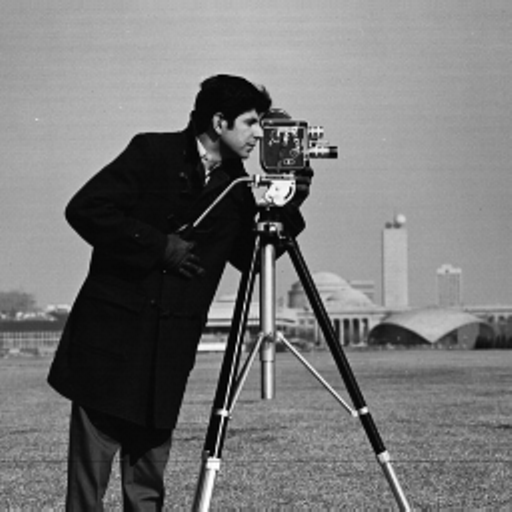

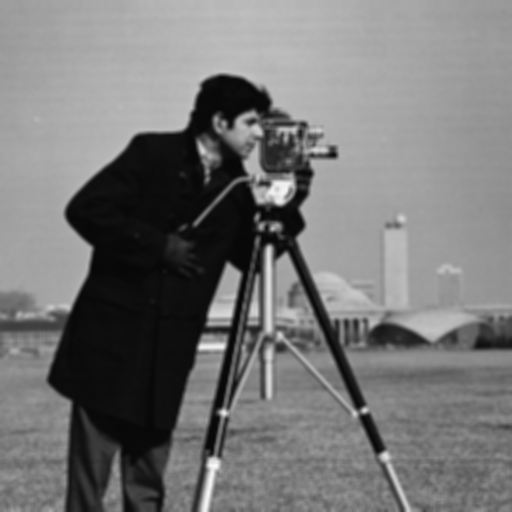

In [ ]:
"""
Apply blurring kernel
"""
kernel2 = np.ones([5,5])   # Define the kernel here
k = kernel2 / 25
img = cv2.filter2D(image, -1, k)  #Define parameters here

cv2_imshow(image)
cv2_imshow(img)

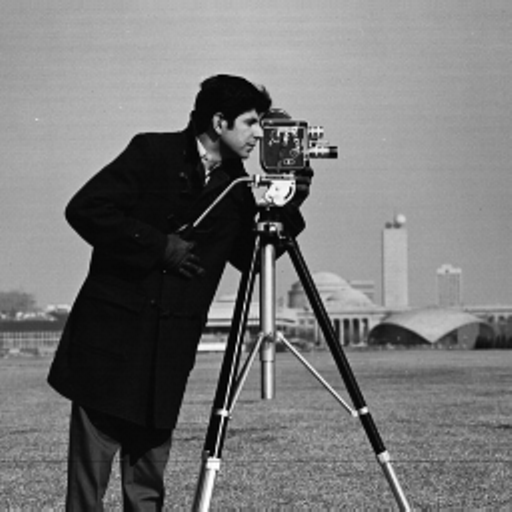

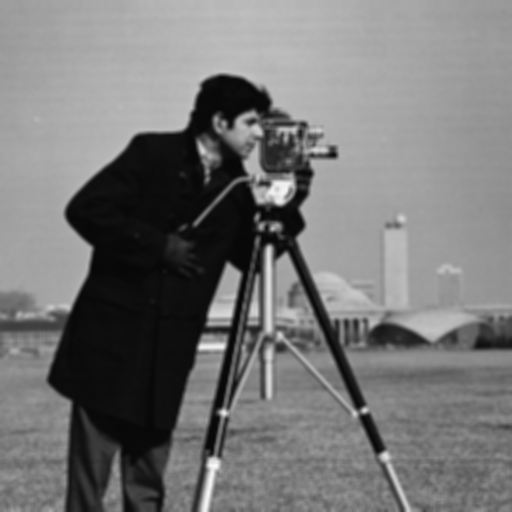

In [ ]:

"""
Apply blur using `blur()` function
"""
img_blur = cv2.blur(image, ksize=(5,5)) # Define parameters here and Use the blur function to blur an image where ksize is the kernel size

cv2_imshow(image)
cv2_imshow(img_blur)

##Applying Gaussian Blurring to an Image in OpenCV

This technique uses a Gaussian filter, which performs a weighted average, as opposed to the uniform average described in the task before. In this case, the Gaussian blur weights pixel values, based on their distance from the center of the kernel. Pixels further from the center have less influence on the weighted average.



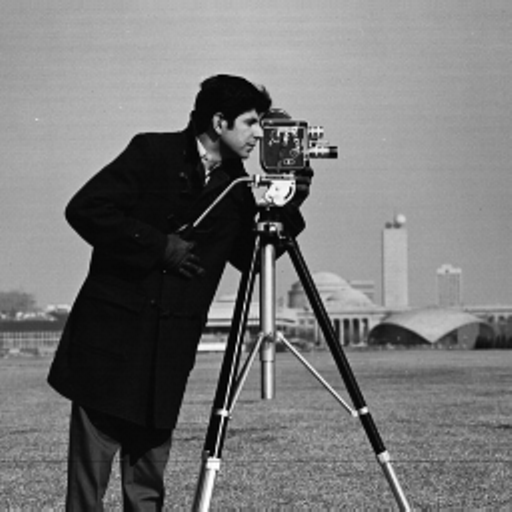

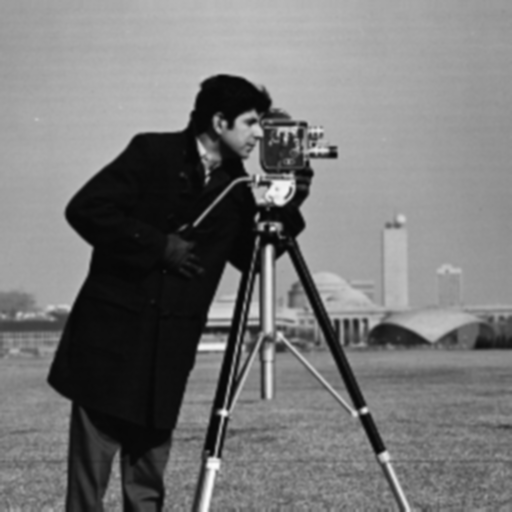

In [ ]:
"""
Apply Gaussian blur
"""
# sigmaX is Gaussian Kernel standard deviation
# ksize is kernel size
gaussian_blur = cv2.GaussianBlur(src=image, ksize=(5,5),sigmaX=0, sigmaY=0)

cv2_imshow(image)
cv2_imshow(gaussian_blur)


**Write your observations as you set the size of each argument to positive values greater than zero for sigmaX and sigmaY, respectively.**

##Applying Median Blurring to an Image in OpenCV
We can also apply median blurring, using the medianBlur() function in OpenCV. In median blurring, each pixel in the source image is replaced by the median value of the image pixels in the kernel area.

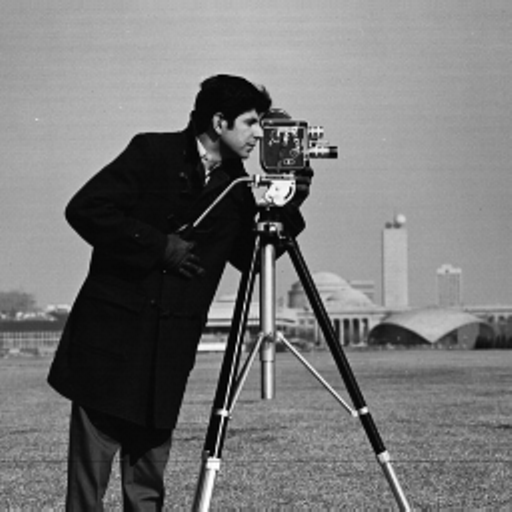

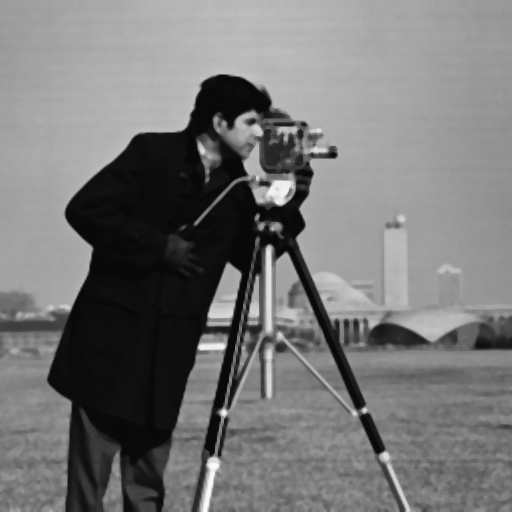

In [ ]:
"""
Apply Median blur
"""
# medianBlur() is used to apply Median blur to image
# ksize is the kernel size
median = cv2.medianBlur(src=image, ksize=5)

cv2_imshow( image) # 'Original'
cv2_imshow( median) # 'Median Blurred'

**What effects do you observe?**

##Sharpening an Image Using 2D-Convolution Kernels
You can also sharpen an image with a 2D-convolution kernel. First define a custom 2D kernel, and then use the filter2D() function to apply the convolution operation to the image.

You can use the 3×3 kernel to define a sharpening kernel.

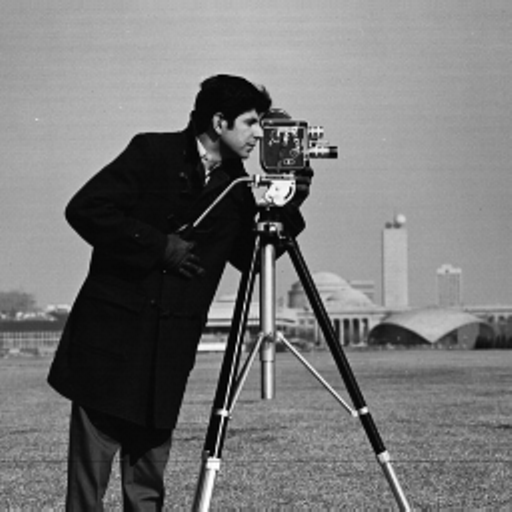

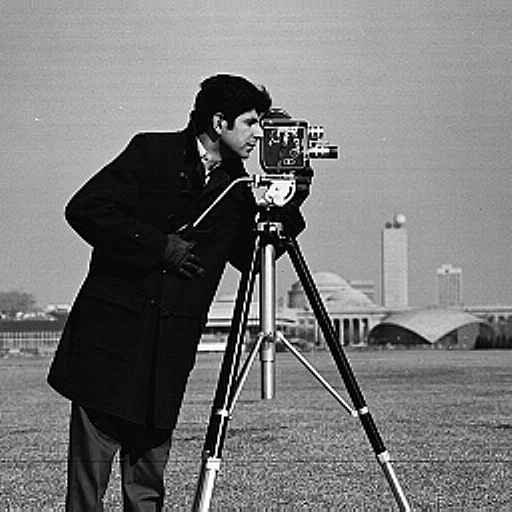

In [ ]:
"""
Apply sharpening using kernel
"""
kernel3 = np.array([[0, -1,  0],
                   [-1,  5, -1],
                    [0, -1,  0]])
sharp_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel3)

cv2_imshow(image)  # 'Original'
cv2_imshow( sharp_img)  # 'Sharpened'

**What effects do you see? Write atleast three observations.**

# Supervised Learning: Linear Regression using polynomials

## Goals
In this part, you will:
- learn how to use polynomials to fit more complex models using linear regression.

<a name="toc_40291_2"></a>
## Problem Statement
[Linear regression](https://www.ibm.com/topics/linear-regression) analysis is used to predict the value of a variable (*y*) based on the value of another variable (*x*). The variable you want to predict is called the dependent variable (*y*). The variable you are using to predict the other variable's value is called the independent variable (*x*).

This form of analysis estimates the coefficients of a linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.



---



**In** this task we are going to see how this algorithm works with a simple example, using the Python library "numpy", especifically the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions.

First, we are going to import some libraries and functions that we will use:


*   **Numpy**, that allows us to work with arrays and create the models
*   The **"pyplot"** package from Matplotlib, that will allow us to plot some results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Then we define some functions that will be useful to plot the results of the models we will create

In [ ]:
# Plot a figure with the data and the regression function
def plot_data(xTrain, yTrain, model, name, xVal = None, yVal = None, validation = False):
  polyline = np.linspace(1.9, 13, 100)

  fig, ax = plt.subplots(figsize=(10, 7))
  plt.scatter(xTrain, yTrain, s=100, c = 'b')
  if validation:
    plt.scatter(xVal, yVal, s=100, c = 'orange')
  plt.rcParams.update({'font.size': 14})

  ax.set_xlabel('years(x)')
  ax.set_ylabel('price(y)')
  ax.set_title('price for used cars '+ name)

  ax.axis([1.5, 13, 0, 12000])
  ax.grid(True);
  plt.plot(polyline, model(polyline))


## DATA

In this case, we are presented with a simple problem: the price of used cars along the years. Cars are then presumed to be in a linear relationship with how old it is. We have two datasets:


*   Training data, where **xTrain** contains a single feature (car age) for the training dataset, and **yTrain** contains the ground truth labels of these samples, in this case the price of the car. This dataset will be used to fit the models we will train.
*   Validation data, where **xVal** contains the features of the validation dataset, so, the age of each car, and **yVal** contains the ground truth of these samples, in this case the price of the car. This dataset will be used to verify how accurate the fitted models are, using data that has not been used to train the model.

In [ ]:
# Training data
xTrain = np.array([2, 2.5, 2.75, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 9.5, 10, 11, 12, 12.5])
# Labels of the training data
yTrain = np.array([11200, 9950, 10750, 9400, 7500, 6300, 5800, 5700, 4200, 4400, 4200, 3800, 3950, 2700, 2100, 2500, 1850, 1800])

# Validation data
xVal = np.array([2.5, 2.75, 3.5, 4, 5, 5.75, 6.5, 7, 8, 8.5, 9, 10.5, 12, 9.5])
# Labels of the validation data
yVal = np.array([10250, 8750, 8500, 5800, 6200, 5000, 4500, 3500, 3250, 3000, 2250, 2500, 2250, 3800])

First, we are going to plot the training data and analize it.

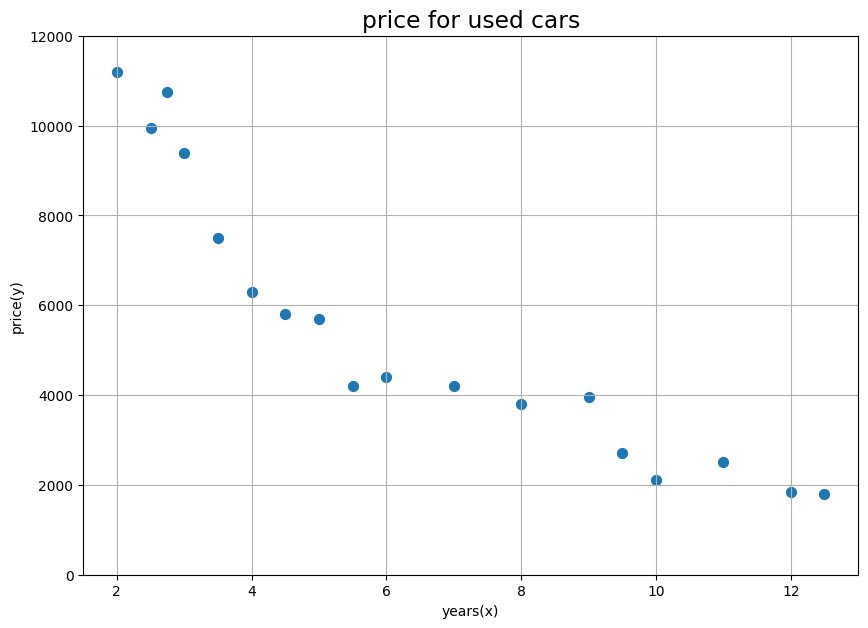

In [ ]:
# Plot the training data
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(xTrain, yTrain, s=50)

plt.rcParams.update({'font.size': 14})

ax.set_xlabel('years(x)')
ax.set_ylabel('price(y)')
ax.set_title('price for used cars')

ax.axis([1.5, 13, 0, 12000])
ax.grid(True)

<a name="toc_40291_2.2"></a>
##  Modeling Linear Regressions
To start, we have an example of how to create a basic regressions function with dregree = 1 using the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions. Next, the mean error percentage is computed for the train data and the fitted function and the training data is plotted.

Mean error train:
24.58


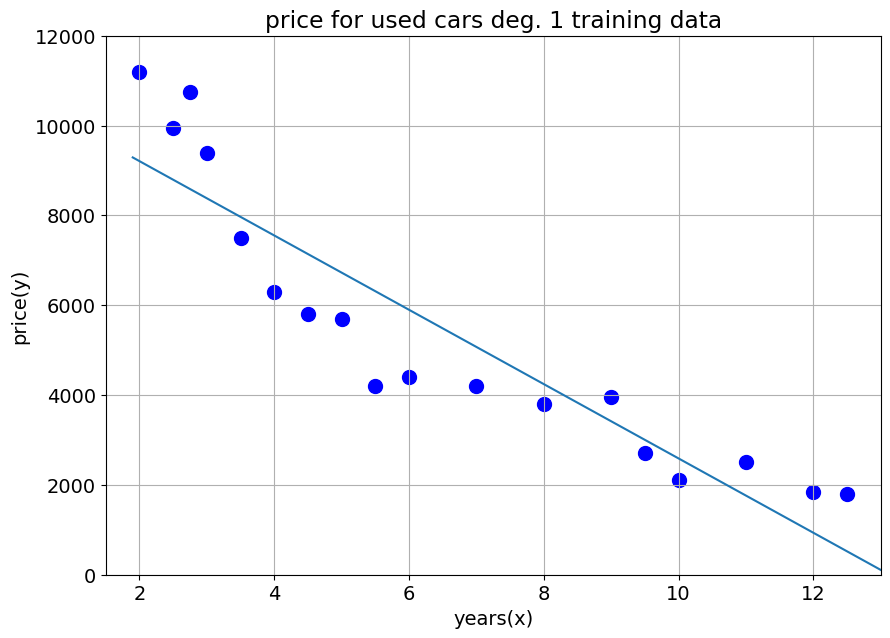

In [ ]:
#polynomial fit with degree = 1
modeld1 = np.poly1d(np.polyfit(xTrain, yTrain, 1))
#mean error percentatge is computed for the train data
print("Mean error train:")
per1 = np.sum(np.abs(modeld1(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(round(per1,2))
# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 training data")

Sometimes a higher degree function give better results to our problems.

Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones. **Which one is better?**

Mean error train deg. 2:
14.207545998417812
Mean error train deg. 4:
8.809393580201247


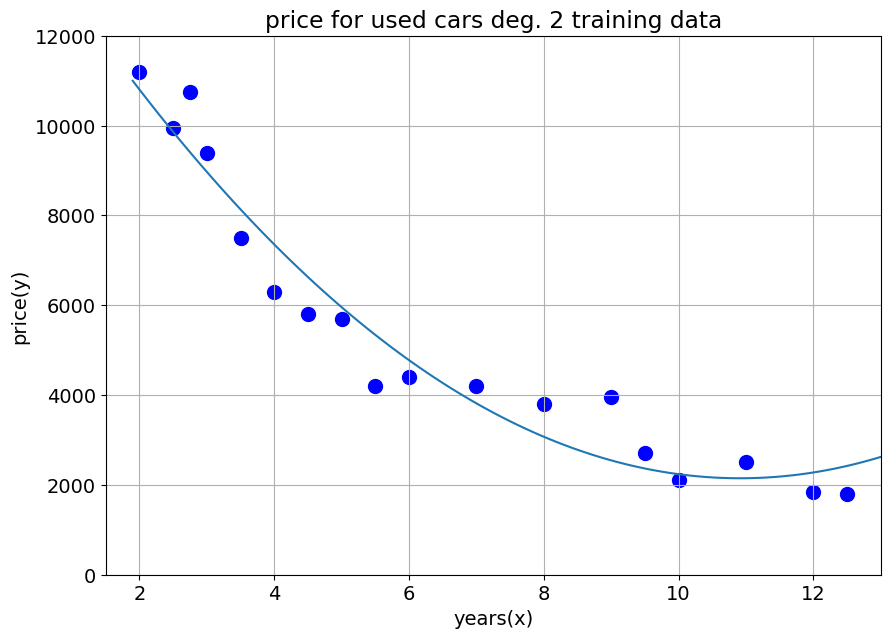

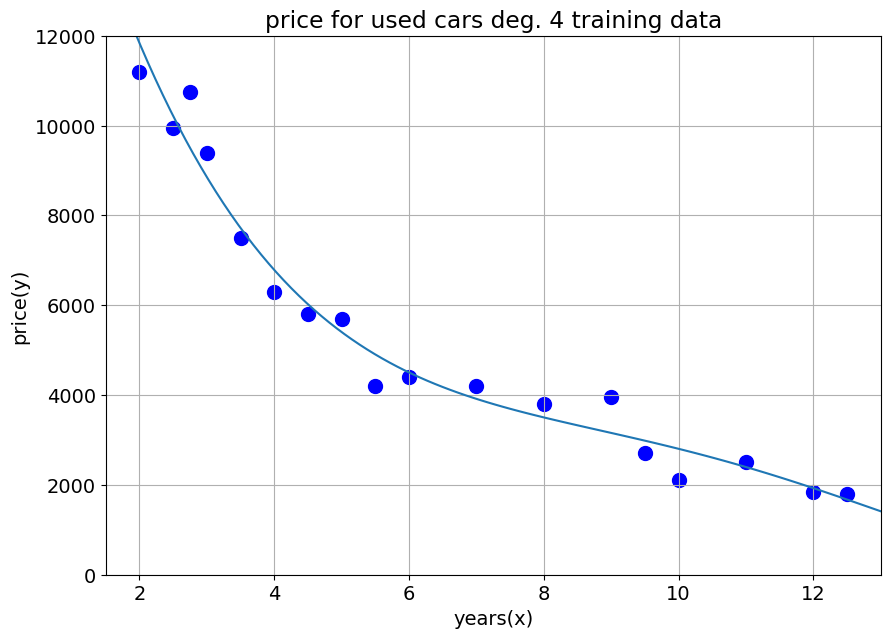

In [ ]:
# TO DO: Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones.

#polynomial fit with degree = 2
modeld2 =   np.poly1d(np.polyfit(xTrain, yTrain, 2))
#mean error percentatge is computed for the train data
print("Mean error train deg. 2:")
per1 = np.sum(np.abs(modeld2(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per1)
# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 training data")

#polynomial fit with degree = 4
modeld4 = np.poly1d(np.polyfit(xTrain, yTrain, 4))
#mean error percentatge is computed for the train data
print("Mean error train deg. 4:")
per2 = np.sum(np.abs(modeld4(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per2)
# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 training data")

As we saw before, we have another dataset called "validation data" that allows us to further check which model is better for us. Compute the mean error percentage for the model with the validation data and compare them with the training data . **Now, which model do you think is better for our data? Is it the same as the one chosen before? Explain why.**

Mean error train model deg 1:
24.58073942307833
Mean error test model deg 1:
25.17368105669305
Mean error train model deg 2:
14.207545998417812
Mean error test model deg 2:
9.982021272220376
Mean error train model deg 4:
8.809393580201247
Mean error test model deg 4:
12.30018037115111


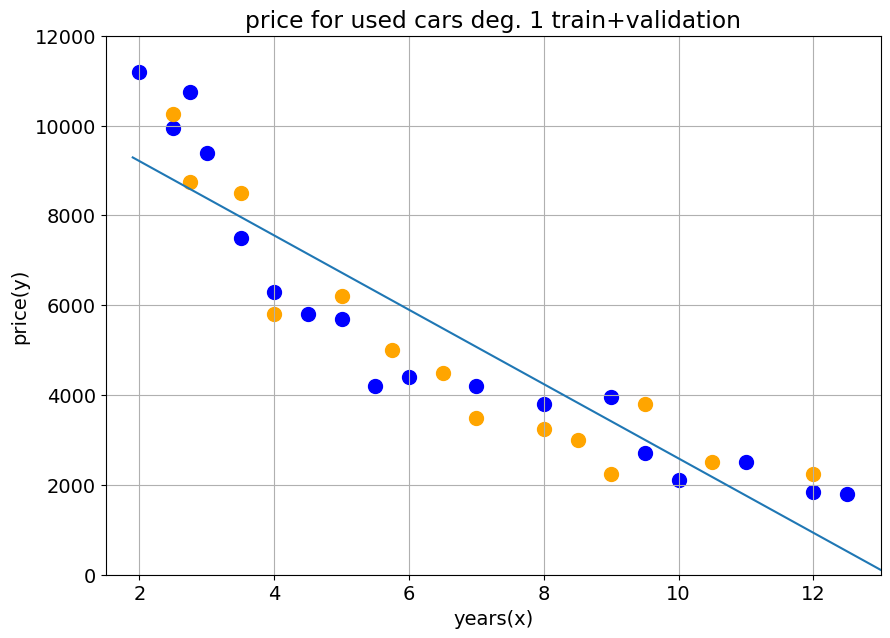

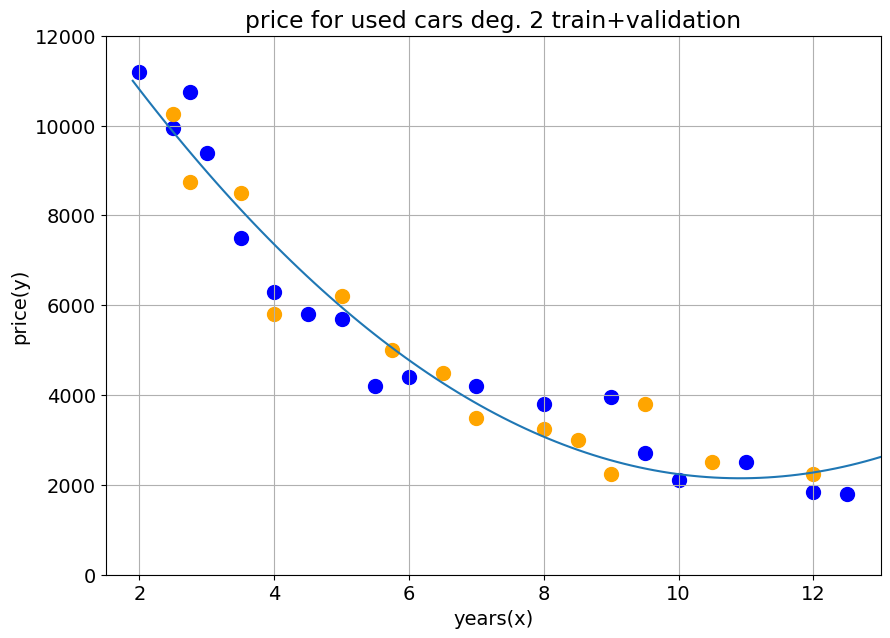

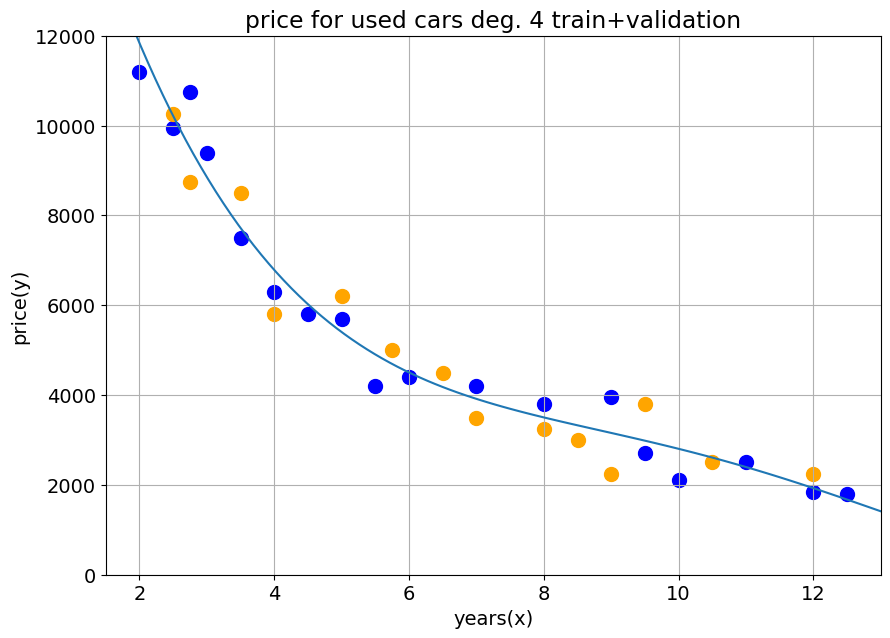

In [ ]:
#mean error percentatge for model deg. 1 is computed for the train and validation data
print("Mean error train model deg 1:")
per1_train =  np.sum(np.abs(modeld1(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per1_train)
print("Mean error test model deg 1:")
per1_val =  np.sum(np.abs(modeld1(xVal)-yVal)/yVal)/len(yVal)*100
print(per1_val)

# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 2 is computed for the train and validation data
print("Mean error train model deg 2:")
per2_train = np.sum(np.abs(modeld2(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per2_train)
print("Mean error test model deg 2:")
per2_val =  np.sum(np.abs(modeld2(xVal)-yVal)/yVal)/len(yVal)*100
print(per2_val)

# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 4 is computed for the train and validation data
print("Mean error train model deg 4:")
per4_train =  np.sum(np.abs(modeld4(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per4_train)
print("Mean error test model deg 4:")
per4_val =  np.sum(np.abs(modeld4(xVal)-yVal)/yVal)/len(yVal)*100
print(per4_val)

# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 train+validation", xVal, yVal, True)

In reality, when running Gradient Descent, your loss is computed as the Mean Squared Error.
1. Import the function "mean_squared_error" from the library "sklearn.metrics"
2. Create a FOR loop that trains models from degree 1 to degree 14
3. Plot the model at every iteration, and compute de MSE for train and for validation. Store them in two vectors "TrainMSE" and "ValMSE".


In [ ]:
# Import library
from sklearn.metrics import mean_squared_error

# For loop

TrainMSE = []
ValMSE = []

for i in range(1,15):
    modeldd =   np.poly1d(np.polyfit(xTrain, yTrain, i))
    p_train =  np.sum(np.abs(modeldd(xTrain)-yTrain)/yTrain)/len(yTrain)*100
    p_val =  np.sum(np.abs(modeldd(xVal)-yVal)/yVal)/len(yVal)*100
    TrainMSE.append(p_train)
    ValMSE.append(p_val)







Plot "TrainMSE" and "ValMSE" for every degree of polynomial. **What would be the best model? Explain why**

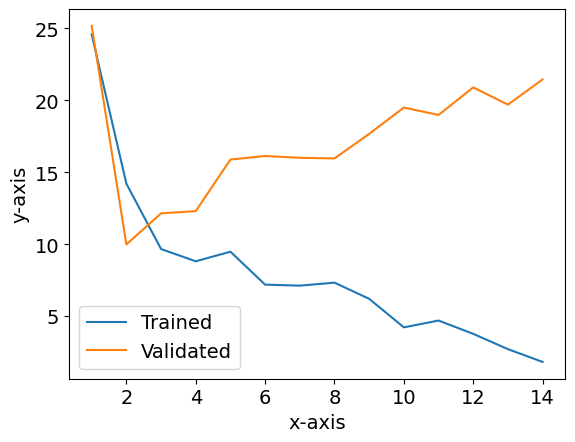

In [ ]:
# Plot TrainMSE and ValMSE to compare the fitted models computed above

import matplotlib.pyplot as plt

n = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

plt.plot(n, TrainMSE,label= "Trained")
plt.plot(n, ValMSE,label = "Validated")

plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.legend()



Submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.